# Tareas:
- ### Definición del problema. **<u>CHECK</u>**
- ### Recopilación de datos. **<u>CHECK</u>**
- ### Exploratory Data Analysis (EDA). **<u>IN PROGRESS</u>**
  - 
- ### Procesamiento de Datos:
  - Cambiar nombre a las columnas (Aparece el el FAQ de la pagina de FICO)

- ### Métodos de Validación.
- ### Modelo de Machine Learning.
- ### Desempeño del modelo (métricas).
- ### Tuning.
- ### Resultados y Conclusiones.

<p style="text-align: center; font-size: 30px;">Línea de Crédito con Garantía Hipotecaria. <br> Predicción de Riesgo.</p>

<div style="text-align:center;">
  <img src="https://daxg39y63pxwu.cloudfront.net/hackerday_banner/hq/loan-default-risk-prediction-machine-learning-project.jpg" alt="Loan Default Risk Prediction" width="70%">
</div>

# 1. Introducción

<span style="font-size:larger;">
    
Este proyecto se centra en un conjunto de datos anonimizados de solicitudes de líneas de crédito con garantía hipotecaria (HELOC) realizadas por propietarios reales. Un **HELOC** es una línea de crédito ofrecida típicamente por un banco como un porcentaje del capital acumulado en una vivienda (la diferencia entre el valor de mercado actual de una vivienda y su precio de compra). Los clientes en este conjunto de datos han solicitado una línea de crédito en el rango de `5,000$` a `150,000$`. La **<u>tarea fundamental</u>** de este proyecto es utilizar la información sobre el solicitante en su informe crediticio para **<u>predecir si pagará su cuenta de HELOC en un plazo de 2 años</u>**. Esta predicción se utiliza luego para decidir si el propietario califica para una línea de crédito y, en caso afirmativo, cuánto crédito se debe otorgar.

</span>

<span style="font-size:larger;">
    
Antes de pasar a la descripción de las variables es importante definir los siguientes términos:
- <u>**"Cuenta Comercial"**</u>:<br>Las cuentas comerciales de un cliente se refieren a las relaciones financieras que el cliente ha establecido con diversas entidades comerciales. Estas cuentas representan acuerdos o transacciones financieras que el cliente mantiene con empresas, instituciones financieras o proveedores de servicios. Las cuentas comerciales pueden incluir una variedad de productos y servicios financieros, y las transacciones asociadas con estas cuentas quedan registradas en el historial crediticio del cliente. La información de las cuentas comerciales que posee un cliente nos da una idea del comportamiento financiero de este.
    
- <u>**"Préstamos de Instalación"**</u>:<br> Estos son préstamos que se otorgan para financiar la compra de bienes duraderos o servicios específicos que generalmente se pagan en cuotas fijas a lo largo del tiempo. Estos préstamos son comunes para la adquisición de activos como automóviles, electrodomésticos, muebles, mejoras en el hogar, entre otros.
    - <u>**"Carga de Préstamos de Instalación"**</u>:<br> Es la proporción de la deuda relacionada con estos préstamos específicos con respecto al límite total de crédito disponible. Este indicador se utiliza para comprender la diversidad de las deudas de un individuo y evaluar cómo están utilizando su crédito para diferentes propósitos. Un bajo porcentaje puede indicar una gestión más equilibrada y diversa del crédito.<br>
    *<u>Ejemplo</u>*: Supongamos que tenemos una tarjeta de crédito con un límite total de `10,000$`. De ese límite, utilizamos `2,000$` para financiar la compra de muebles nuevos para el hogar, que pagamos en cuotas mensuales. La carga de préstamo de instalación sería del 20%, lo que significa que el 20% de tu límite total de crédito se está utilizando específicamente para préstamos de instalación.<br><br>
    
- <u>**"Consulta crediticia"**</u>:<br> Es la revisión de la información crediticia de un individuo por parte de una entidad financiera u otra institución autorizada. Esta consulta se realiza para evaluar la solvencia crediticia de la persona.
    
- <u>**"Línea de Crédito Rotativo"**</u>:<br> Es una forma de crédito renovable que permite a los individuos tomar prestado repetidamente hasta un límite preestablecido. Las tarjetas de crédito son un ejemplo común de líneas de crédito rotativo.
    - <u>**"Carga de Crédito Rotativo"**</u>:<br> Representa la cantidad de la línea de crédito rotativo que está actualmente en uso. Se expresa típicamente como un porcentaje que indica cuánto del crédito disponible se está utilizando actualmente. La carga de crédito rotativo es un factor importante en la evaluación del riesgo crediticio ya que, un alto porcentaje de carga de crédito rotativo puede interpretarse como una señal de riesgo, indicando una mayor dependencia del crédito.<br>
    *<u>Ejemplo</u>*: Una persona tiene una tarjeta de crédito con un límite de `1,000$` y ha utilizado $300, la carga de crédito rotativo sería del 30%.

</span>

<span style="font-size:larger;">
    
Mostramos a continuación la información contenida en el informe crediticio de un cliente, que se tendrán en cuenta a la hora de predecir si este presenta riesgo de impago o no:

</span>

| **Variable**                           | **Descripción**                                                                                    | **Utilidad**                                                                                                                                                       |
|----------------------------------------|----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **'RiskPerformance'**                  | Variable a predecir que indica el rendimiento de riesgo del cliente.                               | Esencial para la predicción y evaluación final del riesgo crediticio.                                                                                                |
| **'ExternalRiskEstimate'**             | Estimación numérica del riesgo crediticio externo asociado al cliente.                              | Un valor más alto indica un mayor riesgo, crucial para evaluar la capacidad del cliente para cumplir con los pagos.                                                 |
| **'MSinceOldestTradeOpen'**            | Meses desde la apertura de la cuenta comercial más antigua del cliente.                              | La estabilidad a largo plazo puede sugerir un comportamiento crediticio más confiable.                                                                             |
| **'MSinceMostRecentTradeOpen'**        | Meses desde la apertura de la cuenta comercial más reciente del cliente.                             | Indica la antigüedad de la cuenta comercial más reciente en meses.                                                                                                   |
| **'AverageMInFile'**                   | Promedio de meses que la información crediticia del cliente ha estado en archivo.                    | Ayuda a entender la consistencia y estabilidad en el historial crediticio a lo largo del tiempo.                                                                    |
| **'NumSatisfactoryTrades'**            | Número de operaciones comerciales que el cliente ha manejado de manera satisfactoria.               | Indica la capacidad del cliente para manejar transacciones de manera exitosa.                                                                                        |
| **'NumTrades60Ever2DerogPubRec'**      | Número de operaciones comerciales en los últimos 60 meses con al menos dos registros derogatorios o públicos. | Indica la presencia de eventos negativos recientes.                                                                                                                |
| **'NumTrades90Ever2DerogPubRec'**      | Número de operaciones comerciales en los últimos 90 meses con al menos dos registros derogatorios o públicos. | Similar al anterior, pero en un periodo de tiempo más amplio.                                                                                                      |
| **'PercentTradesNeverDelq'**           | Porcentaje de transacciones comerciales en las que el cliente nunca ha incurrido en demoras.         | Representa la buena conducta de pago del cliente.                                                                                                                   |
| **'MSinceMostRecentDelq'**             | Meses desde la última demora en el pago.                                                           | Muestra el tiempo desde la última vez que el cliente no cumplió con los pagos.                                                                                     |
| **'MaxDelq2PublicRecLast12M'**        | Máxima demora atrasada a registros públicos en los últimos 12 meses.                                | Indica la gravedad de las demoras en los últimos 12 meses.                                                                                                          |
| **'MaxDelqEver'**                      | Máxima demora atrasada jamás registrada.                                                          | Refleja la demora más severa que el cliente ha experimentado.                                                                                                       |
| **'NumTotalTrades'**                   | Número total de operaciones comerciales en el historial crediticio.                                 | Representa la cantidad global de transacciones comerciales en la historia del cliente.                                                                             |
| **'NumTradesOpeninLast12M'**           | Número de operaciones comerciales abiertas en los últimos 12 meses.                                  | Indica cuántas cuentas comerciales ha abierto el cliente recientemente.                                                                                             |
| **'PercentInstallTrades'**            | Porcentaje de transacciones comerciales relacionadas con instalaciones crediticias.                 | Representa la proporción de transacciones asociadas a préstamos de instalación.                                                                                     |
| **'MSinceMostRecentInqexcl7days'**    | Meses desde la última consulta crediticia (excluyendo las realizadas en los últimos 7 días).        | Muestra el tiempo desde la última vez que se consultó la información crediticia.                                                                                    |
| **'NumInqLast6M'**                    | Número de consultas a la información crediticia en los últimos 6 meses.                              | Indica cuántas veces se ha revisado el historial crediticio en un periodo reciente.                                                                                |
| **'NumInqLast6Mexcl7days'**           | Número de consultas a la información crediticia en los últimos 6 meses (excluyendo las realizadas en los últimos 7 días). | Similar al anterior, pero excluyendo consultas muy recientes.                                                                                                       |
| **'NetFractionRevolvingBurden'**      | Fracción neta de la carga de crédito rotativo.                                                     | Representa la proporción de la deuda en tarjetas de crédito respecto al límite total.                                                                              |
| **'NetFractionInstallBurden'**        | Fracción neta de la carga de préstamos de instalación.                                             | Indica la proporción de la deuda en préstamos de instalación respecto al límite total.                                                                              |
| **'NumRevolvingTradesWBalance'**      | Número de operaciones comerciales rotativas con saldo pendiente.                                    | Indica cuántas cuentas de tarjetas de crédito tienen saldos pendientes.                                                                                             |
| **'NumInstallTradesWBalance'**        | Número de operaciones comerciales de instalación con saldo pendiente.                               | Similar al anterior, pero para cuentas de préstamos de instalación.                                                                                                 |
| **'NumBank2NatlTradesWHighUtilization'** | Número de operaciones comerciales de bancos frente a operaciones nacionales con alta utilización.  | Indica la presencia de cuentas de bancos con alto uso en comparación con cuentas nacionales.                                                                        |
| **'PercentTradesWBalance'**            | Porcentaje de transacciones comerciales con saldo pendiente.                                        | Representa el porcentaje de transacciones comerciales en las que el cliente mantiene un saldo pendiente.                                                            |

# 2. Importación de paquetes y DataSet

## 2.1. Paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Preprocesado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


# Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score




from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## 2.2. DataSet
<span style="font-size:larger;">

El DataSet de trabajo es propiedad de [FICO](https://www.fico.com/en).<br>

Los datos se han obtenido en [huggingface](https://huggingface.co/datasets/mstz/heloc), gracias a [Mattia](https://huggingface.co/mstz).
    
</span>


In [2]:
df = pd.read_csv("heloc.csv")

# 3. Análisis Exploratorio de Datos

In [3]:
df.head(3)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [5]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


Podemos observar valores negativos en algunas variables. Según la fuente de datos estos valores se deben a lo siguiente:


In [ ]:
fig, axes =  plt.subplots(6, 4, figsize = (15, 20))
axes = axes.flatten()
plot_num = [i for i in range(axes.size) if i%2 == 0]

columns = df.columns[1:]
for idx, col in zip(plot_num, columns):
    sns.histplot(x = df[col], bins = 35, kde = True, ax = axes[idx])
    axes[idx].set_xlabel(f'{col} Distribution')
    sns.boxplot(x = df[col], ax = axes[idx + 1])
    axes[idx + 1].set_xlabel(f'{col} Boxplot')
    
plt.tight_layout()    
plt.show()

In [7]:
df_clean["NumTrades90Ever2DerogPubRec"]

NameError: name 'df_clean' is not defined

In [ ]:
df_clean.describe()

In [8]:
def outliers(variable):
    '''
    Fución para obtener el límite superior e inferior tras calcular el rango intercuartílico.
    '''
    Q1 = variable.quantile(q = 0.25)
    Q3 = variable.quantile(q = 0.75)

    # Rango intercuartil (IQR)
    IQR = Q3 - Q1

    # Calcular los limites inferior y superior
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    return lim_inf, lim_sup

In [9]:
for col in columns:

    lim_inf, lim_sup = outliers(df[col])

    percentage_outliers = len(df[(~df[col].between(lim_inf, lim_sup))])*100/len(df)
    print(f"Percentage of outliers in the '{col}' column: {round(percentage_outliers, 2)} %")

Percentage of outliers in the 'ExternalRiskEstimate' column: 5.77 %
Percentage of outliers in the 'MSinceOldestTradeOpen' column: 1.41 %
Percentage of outliers in the 'MSinceMostRecentTradeOpen' column: 7.25 %
Percentage of outliers in the 'AverageMInFile' column: 2.21 %
Percentage of outliers in the 'NumSatisfactoryTrades' column: 1.76 %
Percentage of outliers in the 'NumTrades60Ever2DerogPubRec' column: 11.12 %
Percentage of outliers in the 'NumTrades90Ever2DerogPubRec' column: 26.96 %
Percentage of outliers in the 'PercentTradesNeverDelq' column: 10.34 %
Percentage of outliers in the 'MSinceMostRecentDelq' column: 7.45 %
Percentage of outliers in the 'MaxDelq2PublicRecLast12M' column: 5.62 %
Percentage of outliers in the 'MaxDelqEver' column: 5.62 %
Percentage of outliers in the 'NumTotalTrades' column: 2.16 %
Percentage of outliers in the 'NumTradesOpeninLast12M' column: 6.75 %
Percentage of outliers in the 'PercentInstallTrades' column: 1.41 %
Percentage of outliers in the 'MSince

In [18]:
for col in columns:
    lim_inf, lim_sup = outliers(df[col])

    # Filtrar los valores que no están en el rango aceptable
    outliers_mask = ~df[col].between(lim_inf, lim_sup)

    # Eliminar los outliers del DataFrame
    df = df[~outliers_mask]

    percentage_outliers = outliers_mask.sum() * 100 / len(df)
    print(f"Percentage of outliers removed in the '{col}' column: {round(percentage_outliers, 2)} %")

# Si deseas restablecer los índices del DataFrame después de eliminar filas
df.reset_index(drop=True, inplace=True)


Percentage of outliers removed in the 'ExternalRiskEstimate' column: 6.12 %
Percentage of outliers removed in the 'MSinceOldestTradeOpen' column: 1.71 %
Percentage of outliers removed in the 'MSinceMostRecentTradeOpen' column: 6.85 %
Percentage of outliers removed in the 'AverageMInFile' column: 1.7 %
Percentage of outliers removed in the 'NumSatisfactoryTrades' column: 2.05 %
Percentage of outliers removed in the 'NumTrades60Ever2DerogPubRec' column: 6.08 %
Percentage of outliers removed in the 'NumTrades90Ever2DerogPubRec' column: 22.39 %
Percentage of outliers removed in the 'PercentTradesNeverDelq' column: 9.63 %
Percentage of outliers removed in the 'MSinceMostRecentDelq' column: 12.19 %
Percentage of outliers removed in the 'MaxDelq2PublicRecLast12M' column: 17.93 %
Percentage of outliers removed in the 'MaxDelqEver' column: 27.44 %
Percentage of outliers removed in the 'NumTotalTrades' column: 1.08 %
Percentage of outliers removed in the 'NumTradesOpeninLast12M' column: 2.77 %
P

In [33]:
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Good,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,Bad,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,Bad,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,Bad,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


C:\Users\Adri1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ExternalRiskEstimate', ylabel='Count'>

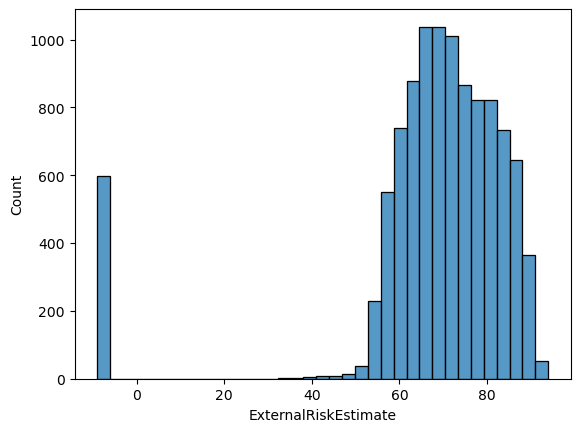

In [10]:
sns.histplot(df["ExternalRiskEstimate"], bins= 35)

In [11]:
df_sin_neg = df[df["ExternalRiskEstimate"]<0]

# Quitamos todos los clientes con valores negativos e iguales a -9 en todas las columnas

In [12]:
df_preprocess = df.copy()

In [13]:
df_preprocess = df[~(df.iloc[:, 1:] <= 0).all(axis=1)]

In [14]:
df_preprocess["RiskPerformance"] = df_preprocess["RiskPerformance"].apply(lambda x: 1 if x == "Good" else 0)

C:\Users\Adri1\AppData\Local\Temp\ipykernel_6972\3166816373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess["RiskPerformance"] = df_preprocess["RiskPerformance"].apply(lambda x: 1 if x == "Good" else 0)


In [15]:
df_preprocess

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,1,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,0,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,0,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,0,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [16]:
########################################################################################################################################################################################################

In [17]:
df_preprocess[(df_preprocess.apply(lambda row: any(row == -7), axis=1))]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
10,1,82,96,5,47,16,0,0,100,-7,...,31,0,0,0,15,88,4,2,0,67
12,0,74,274,2,66,23,0,0,100,-7,...,39,0,2,2,18,65,3,5,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10450,1,84,313,6,103,25,0,0,100,-7,...,24,11,0,0,10,92,4,3,0,70
10451,1,79,133,2,68,27,0,0,100,-7,...,36,0,4,4,1,93,4,2,0,60
10452,1,90,197,5,92,13,0,0,100,-7,...,46,4,2,2,5,50,3,3,0,100
10456,0,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56


In [18]:
df_preprocess.describe().T

,count,mean,std,min,25%,50%,75%,max
RiskPerformance,9871.0,0.479688,0.499613,0.0,0.0,0.0,1.0,1.0
ExternalRiskEstimate,9871.0,71.978320,10.198244,-9.0,64.0,72.0,80.0,94.0
MSinceOldestTradeOpen,9871.0,195.714315,101.936102,-8.0,131.0,183.0,255.0,803.0
MSinceMostRecentTradeOpen,9871.0,9.588492,12.963398,0.0,3.0,6.0,12.0,383.0
AverageMInFile,9871.0,78.778138,34.066063,4.0,57.0,76.0,97.0,383.0
NumSatisfactoryTrades,9871.0,21.121467,11.321396,0.0,13.0,20.0,28.0,79.0
NumTrades60Ever2DerogPubRec,9871.0,0.581400,1.238783,0.0,0.0,0.0,1.0,19.0
NumTrades90Ever2DerogPubRec,9871.0,0.384763,0.993223,0.0,0.0,0.0,0.0,19.0
PercentTradesNeverDelq,9871.0,92.359943,11.772876,0.0,89.0,97.0,100.0,100.0
MSinceMostRecentDelq,9871.0,7.701347,20.728177,-8.0,-7.0,0.0,15.0,83.0


# Columnas con valores negativos:
- MSinceOldestTradeOpen
- MSinceMostRecentDelq --> SE VA AL CARAJO
- MSinceMostRecentInqexcl7days
- NetFractionRevolvingBurden
- NetFractionInstallBurden
- NumRevolvingTradesWBalance
- NumInstallTradesWBalance
- NumBank2NatlTradesWHighUtilization
- PercentTradesWBalance

In [19]:
col_neg = [MSinceOldestTradeOpen
MSinceMostRecentDelq
MSinceMostRecentInqexcl7days
NetFractionRevolvingBurden
NetFractionInstallBurden
NumRevolvingTradesWBalance
NumInstallTradesWBalance
NumBank2NatlTradesWHighUtilization
PercentTradesWBalance ]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3066504522.py, line 1)

In [20]:
df_preprocess.applymap(lambda x: x < 0).sum()

C:\Users\Adri1\AppData\Local\Temp\ipykernel_6972\3398589789.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_preprocess.applymap(lambda x: x < 0).sum()


RiskPerformance                          0
ExternalRiskEstimate                    10
MSinceOldestTradeOpen                  239
MSinceMostRecentTradeOpen                0
AverageMInFile                           0
NumSatisfactoryTrades                    0
NumTrades60Ever2DerogPubRec              0
NumTrades90Ever2DerogPubRec              0
PercentTradesNeverDelq                   0
MSinceMostRecentDelq                  4840
MaxDelq2PublicRecLast12M                 0
MaxDelqEver                              0
NumTotalTrades                           0
NumTradesOpeninLast12M                   0
PercentInstallTrades                     0
MSinceMostRecentInqexcl7days          2331
NumInqLast6M                             0
NumInqLast6Mexcl7days                    0
NetFractionRevolvingBurden             186
NetFractionInstallBurden              3419
NumRevolvingTradesWBalance             156
NumInstallTradesWBalance               861
NumBank2NatlTradesWHighUtilization     583
PercentTrad

In [21]:
cols_top_corr = df_preprocess.corr().iloc[0][df_preprocess.corr().iloc[0] >= 0.2].index.values

<Axes: >

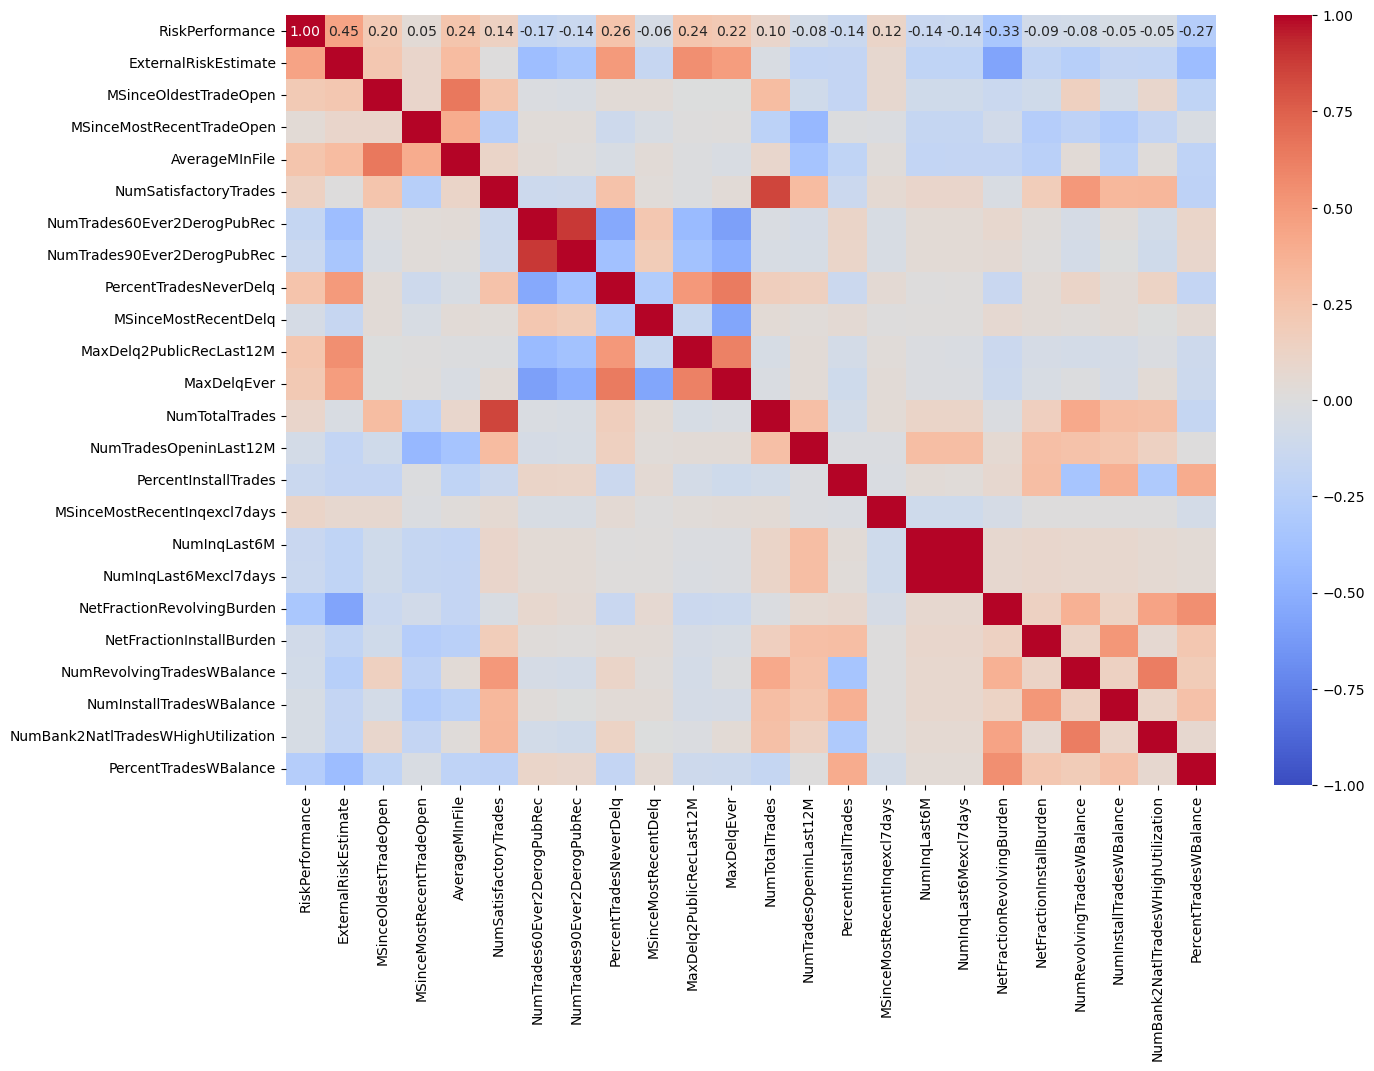

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df_preprocess.corr(), vmin= -1, vmax= 1, cmap= "coolwarm", annot= True, fmt='.2f')

In [23]:
df_preprocess

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,1,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,0,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,0,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,0,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [24]:
df_con_nans = df_preprocess.replace([-9,-8,-7], np.nan)

In [25]:
df_con_nans_nuevo = df_con_nans.drop(["MSinceMostRecentDelq", "NetFractionInstallBurden", "MSinceMostRecentInqexcl7days"], axis= 1)

In [26]:
imputer = KNNImputer(n_neighbors=9)
df_imputed = pd.DataFrame(imputer.fit_transform(df_con_nans), columns=df_con_nans.columns)

In [27]:
X = df_imputed.drop(["RiskPerformance"], axis= 1)
y= df_imputed["RiskPerformance"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (7896, 23), y_train: (7896,)
X_test: (1975, 23), y_test: (1975,)


In [29]:
models = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), NearestCentroid(), RandomForestClassifier(), SVC(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), HistGradientBoostingClassifier()]

In [31]:
columns_plot[:-5].append()

NameError: name 'columns_plot' is not defined

In [41]:
df_imputed[]

SyntaxError: invalid syntax (2271731636.py, line 1)

In [32]:
%%time

resultados = []

for neighbors in tqdm.tqdm(range(1,21)):
    imputer = KNNImputer(n_neighbors= neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_con_nans), columns=df_con_nans.columns)
    df_imputed = df_imputed[columnas_relevantes]
    X = df_imputed.drop(["RiskPerformance"], axis= 1)
    y= df_imputed["RiskPerformance"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

    for model in models:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metricas:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Optimizar para, si sale mejor precision que el anterior, sustituir!

        resultados.append([str(model), model, accuracy, precision, neighbors])

df_resultados = pd.DataFrame(resultados, columns= ["Nombre", "Modelo", "Accuracy", "Precision", "neighbors"])

  0%|          | 0/20 [00:02<?, ?it/s]


NameError: name 'columnas_relevantes' is not defined

In [43]:
df_resultados.sort_values(by= "Precision", ascending= False).head(3)

NameError: name 'df_resultados' is not defined

In [44]:
best_results = []

for neighbors in tqdm.tqdm(range(1,21)):
    imputer = KNNImputer(n_neighbors= neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_con_nans), columns=df_con_nans.columns)
    df_imputed = df_imputed[columnas_relevantes]
    X = df_imputed.drop(["RiskPerformance"], axis= 1)
    y= df_imputed["RiskPerformance"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)
    
    best_model = RandomForestClassifier()

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Metricas:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Optimizar para, si sale mejor precision que el anterior, sustituir!

    best_results.append([str(best_model), best_model, accuracy, precision, neighbors])

df_best_results = pd.DataFrame(best_results, columns= ["Nombre", "Modelo", "Accuracy", "Precision", "neighbors"])

  0%|          | 0/20 [00:00<?, ?it/s]


ValueError: Shape of passed values is (1416, 23), indices imply (1416, 24)

In [45]:
df_best_results.sort_values(by= "Precision", ascending= False)

NameError: name 'df_best_results' is not defined

In [ ]:
columnas_relevantes = columns_plot[:-8]
columnas_relevantes.append("RiskPerformance")

In [ ]:
columnas_relevantes

In [ ]:
# Calculamos Feature Importance
best_model = df_resultados.sort_values(by= "Precision", ascending= False).iloc[0]["Modelo"]
importances = best_model.feature_importances_

indices = np.argsort(importances)[::-1]

columns_plot = list()

for f in range(X.shape[1]):
    
    feature = indices[f]
    importancia = importances[indices[f]]
    column_name = X.columns[f]
    
    columns_plot.append(column_name)
    
plt.figure(figsize = (12, 4))

plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", align = "center")
plt.xticks(range(X.shape[1]), columns_plot, rotation = 90)

# plt.xlim([-1, X.shape[1]])
plt.grid()
plt.show()

In [ ]:
["MSinceMostRecentDelq", "NetFractionInstallBurden", "MSinceMostRecentInqexcl7days"]

## 3.X. Duplicados

<span style="font-size:larger;">
    En esta subsección exploraremos la posibilidad de tener filas duplicadas.
</span>


In [ ]:
df.duplicated().value_counts()

## 3.X. Valores NaN

<span style="font-size:larger;">
Vamos a revisar a continuación si existen valores NaN. Estos pueden generar errores a la hora de entrenar nuestro modelo y en caso de existir se tratarían mediante una de estas opciones:<br>

- Rellenar con la moda o la media del conjunto.
    
- Imputando valores a traves de un algoritmo de vecinos más próximos como KNNImputer.
    
- Considerarlos como una nueva categoría llamada "Indeterminado".
    
- Eliminarlos.
</span>

In [ ]:
df.isna().sum()

<span style="font-size:larger;">
    
**Nuestro DataSet no presenta valores NaN en ninguna de nuestras variables.**
    
</span>

## 3.X. Balance de clases

In [ ]:
df["RiskPerformance"].value_counts(normalized= True)

## 3.X. Correlaciones

In [ ]:
mapeo = {"Good": True, "Bad": False}

df_prueba = df.replace(mapeo)

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df_prueba.corr(), vmin= -1, vmax= 1, cmap= "coolwarm", annot= True)

# Modelos:

- Probar con datos más cercanos
- Probar con datos totales
- 